#Background:
With the rapid development of high technology, significant conveniences have been brought to our lives. While we enjoy this happiness, various criminal activities are also undermining this atmosphere. The security situation is particularly unstable in the United States, especially in large cities like LA, where public safety is a cause for concern. Considering various factors, we have chosen LA crime data (2020-) as the topic for our project this time.


The purpose of this project is to analyze and model crime data using machine learning methods, aiming to uncover correlations between different features, assess their impact on the target variable (such as crime status), and attempt to build a model capable of predicting or explaining crime status.

In order to efficiently manage the exploration and analysis within the available time frame, we have strategically opted to work with a subset of the original dataset, specifically selecting about 8,000 rows (1/100) for our analysis. This decision allows us to streamline the computational demands associated with processing a large dataset and facilitates a more rapid iteration through exploratory data analysis and modeling tasks. Despite the downsizing, this subset remains representative enough to capture key trends, patterns, and characteristics present in the larger dataset. This approach ensures that our analysis is both time-efficient and insightful, striking a balance between resource constraints and the depth of exploration required for meaningful insights.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install umap-learn
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPClassifier

In [ ]:
crime = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sampled_csv_file.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           8117 non-null   int64  
 1   Date Rptd       8117 non-null   object 
 2   DATE OCC        8117 non-null   object 
 3   TIME OCC        8117 non-null   int64  
 4   AREA            8117 non-null   int64  
 5   AREA NAME       8117 non-null   object 
 6   Rpt Dist No     8117 non-null   int64  
 7   Part 1-2        8117 non-null   int64  
 8   Crm Cd          8117 non-null   int64  
 9   Crm Cd Desc     8117 non-null   object 
 10  Mocodes         6960 non-null   object 
 11  Vict Age        8117 non-null   int64  
 12  Vict Sex        7019 non-null   object 
 13  Vict Descent    7019 non-null   object 
 14  Premis Cd       8116 non-null   float64
 15  Premis Desc     8112 non-null   object 
 16  Weapon Used Cd  2758 non-null   float64
 17  Weapon Desc     2758 non-null   o

Providing an initial exploration and understanding of the dataset.

1. The shape of the dataset, indicating the number of rows and columns. This quickly conveys the size of the dataset, helping to establish its dimensions.

2. The entire dataset, offering a visual inspection of the data's structure and content. This is useful for examining the first few rows and gaining an understanding of the data's format and feature values.

3. The column names of the dataset, representing the names of various features. This provides an overview of the dataset's structure, aiding in the interpretation of the meaning behind each feature.

In [ ]:
crime.shape
print(crime)
crime.columns

          DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0     211114745  10/29/2021 12:00:00 AM  09/20/2021 12:00:00 AM      1200   
1     230710292  05/31/2023 12:00:00 AM  05/26/2023 12:00:00 AM      2000   
2     231104968  01/25/2023 12:00:00 AM  01/25/2023 12:00:00 AM      1745   
3     220105943  02/03/2022 12:00:00 AM  02/02/2022 12:00:00 AM      1915   
4     221414988  08/10/2022 12:00:00 AM  08/09/2022 12:00:00 AM      1900   
...         ...                     ...                     ...       ...   
8112  221000791  07/18/2022 12:00:00 AM  07/18/2022 12:00:00 AM      1940   
8113  221308749  03/28/2022 12:00:00 AM  03/28/2022 12:00:00 AM      1655   
8114  211004254  01/08/2021 12:00:00 AM  01/05/2021 12:00:00 AM       906   
8115  211613985  12/01/2021 12:00:00 AM  12/01/2021 12:00:00 AM      1400   
8116  210610672  06/03/2021 12:00:00 AM  06/02/2021 12:00:00 AM      2300   

      AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0       11    Nor

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

This code performs visual analysis on non-numeric (categorical) columns in the dataset. Specifically, it utilizes the Seaborn library to create bar plots for each non-numeric column, displaying the counts for each category.

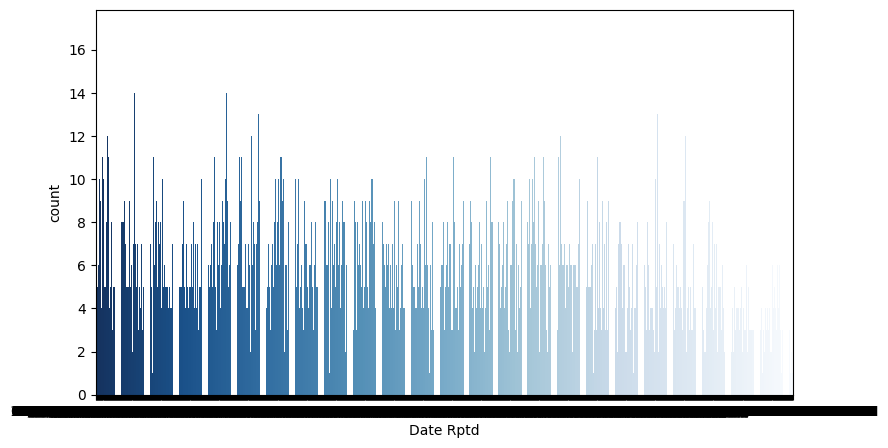

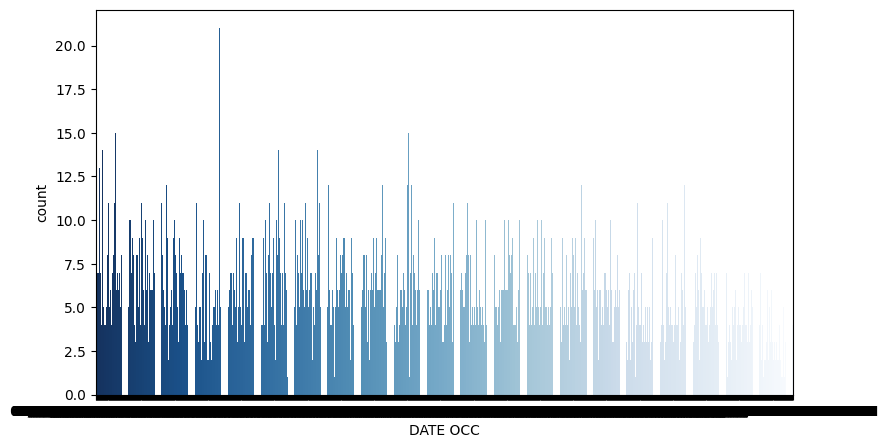

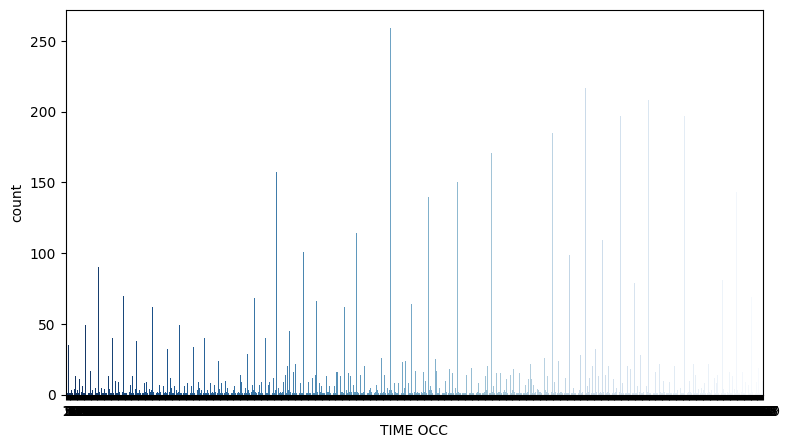

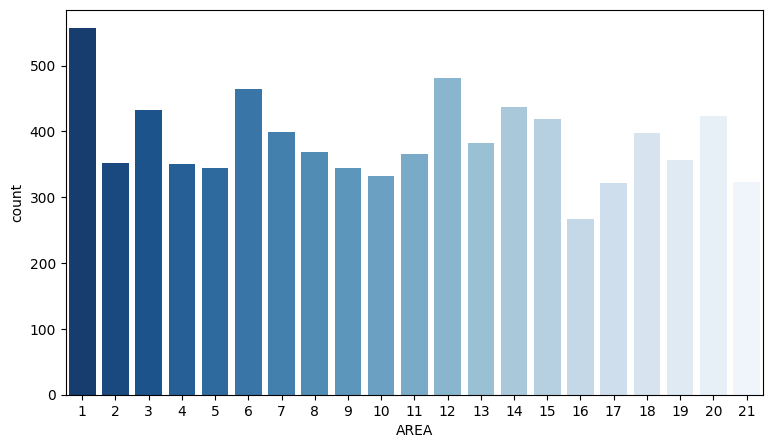

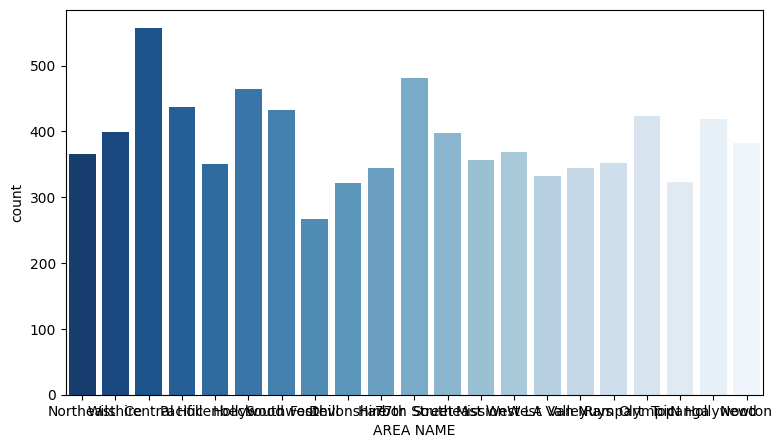

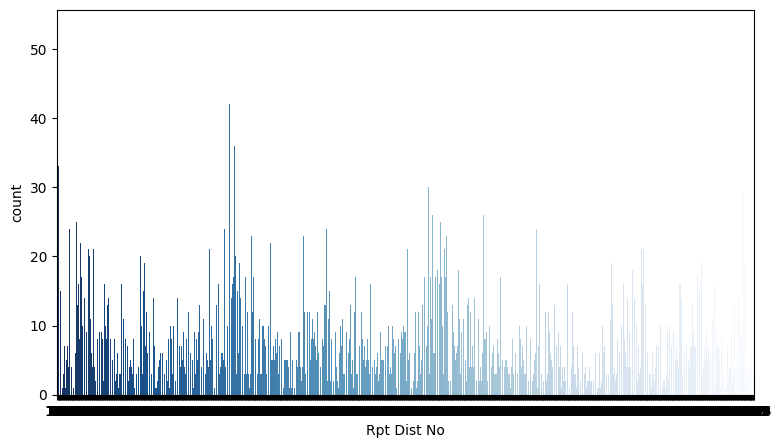

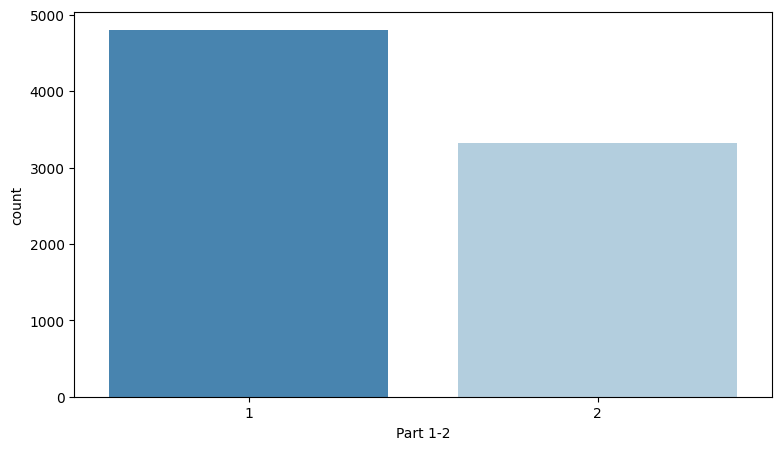

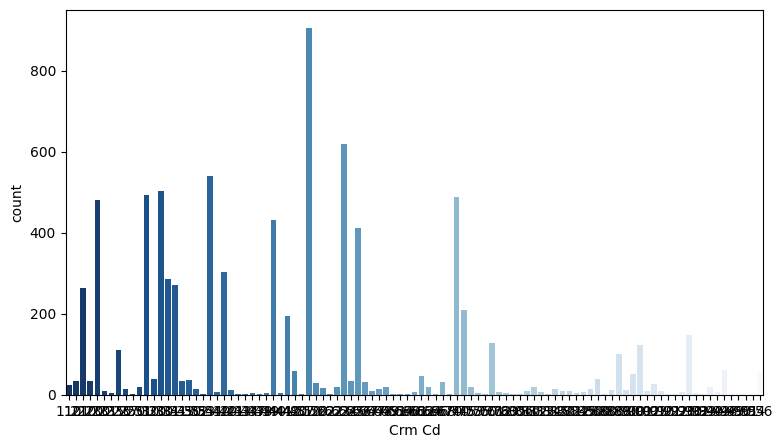

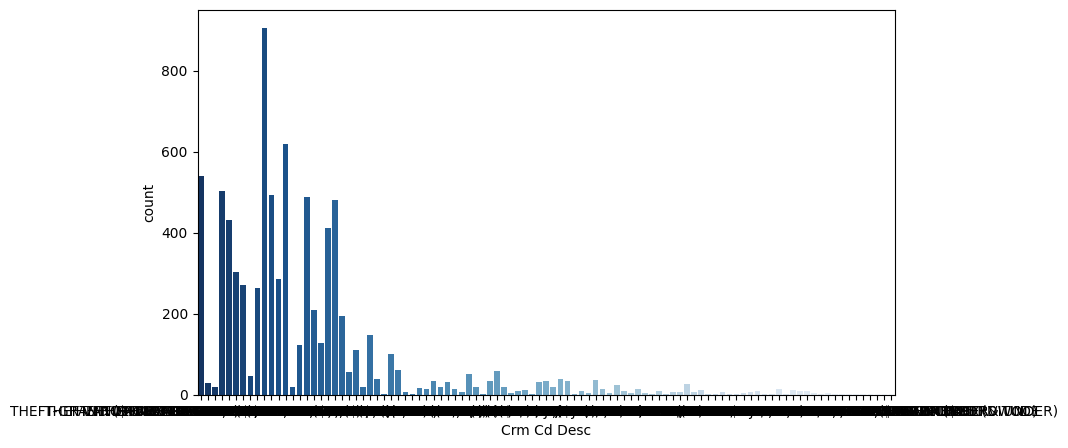

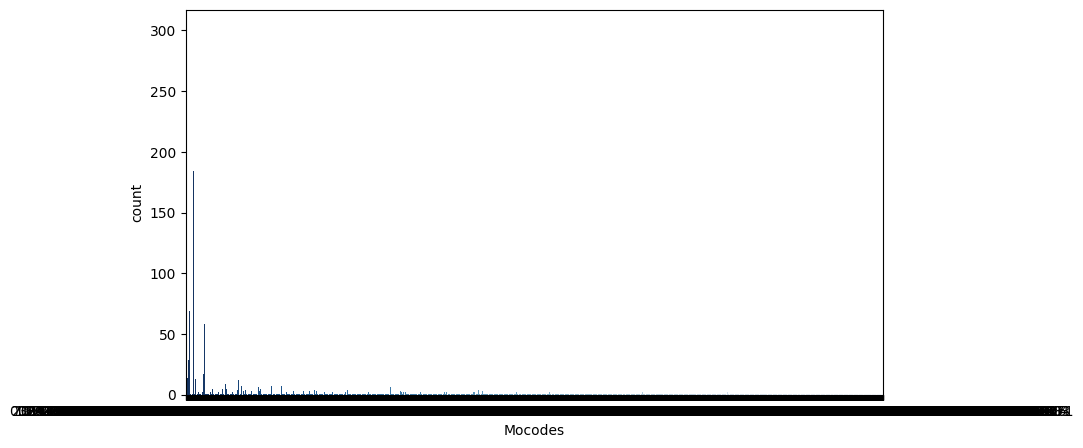

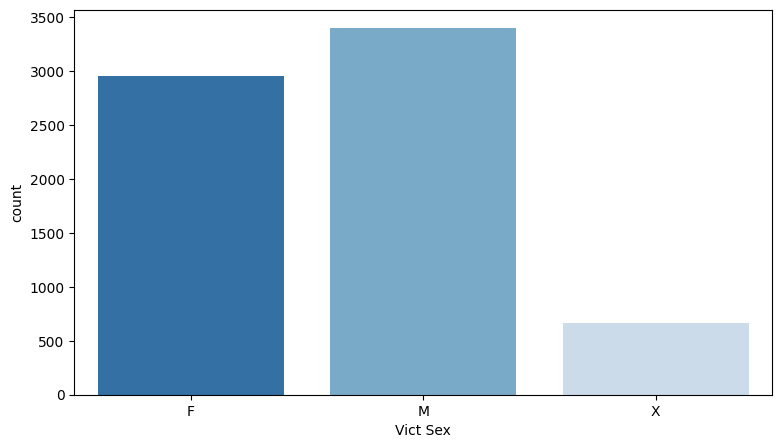

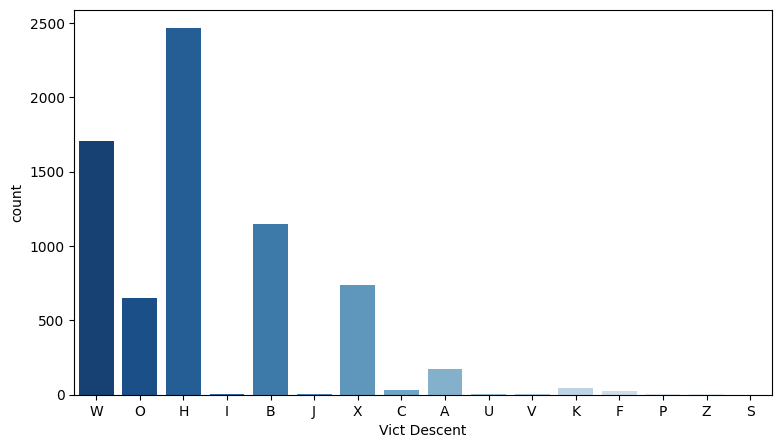

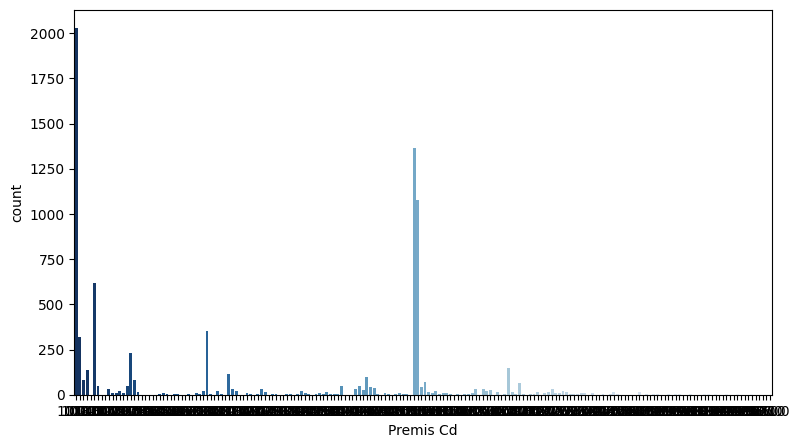

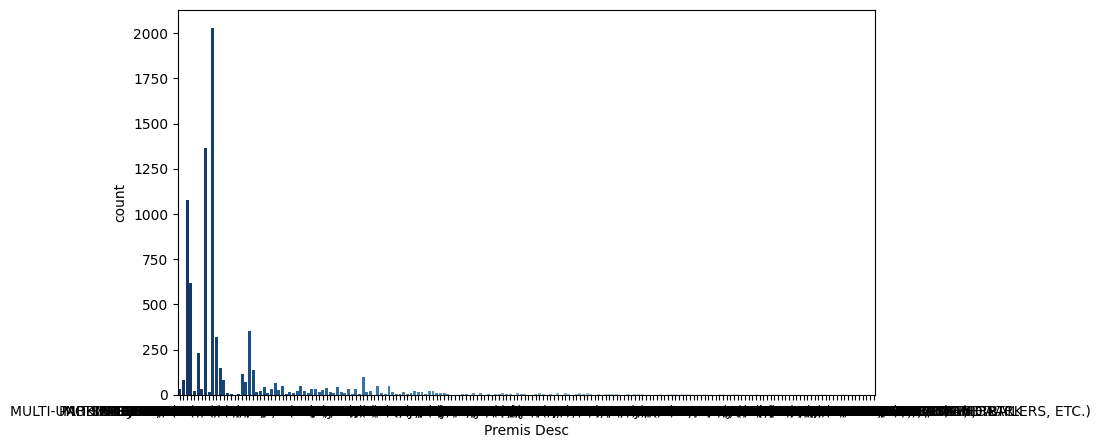

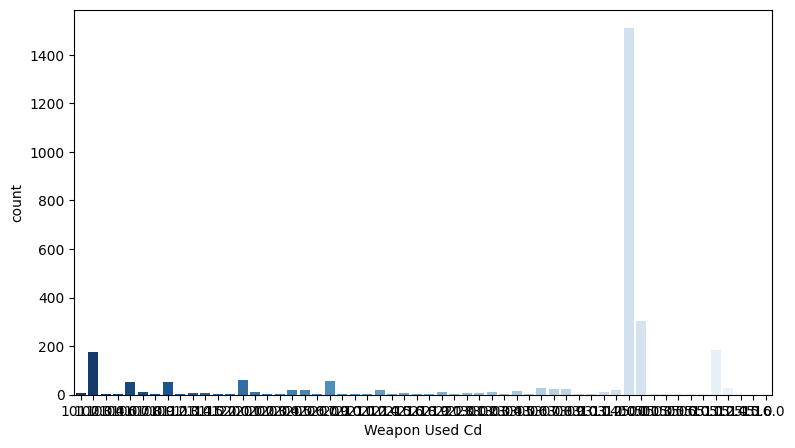

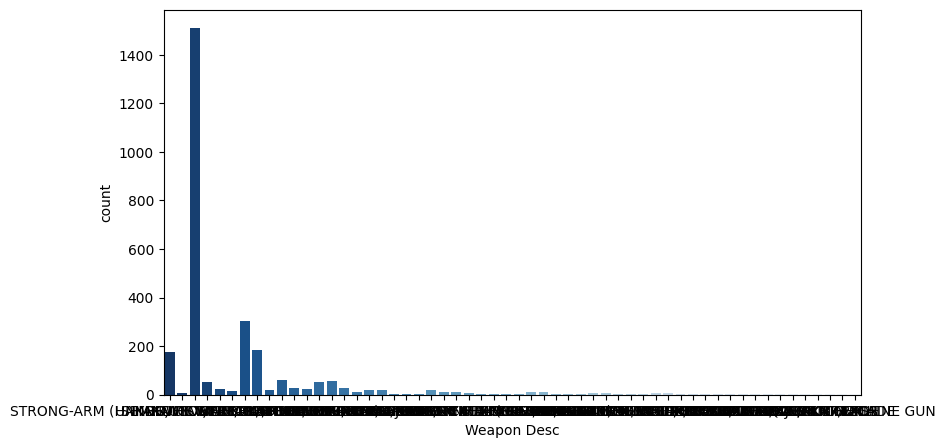

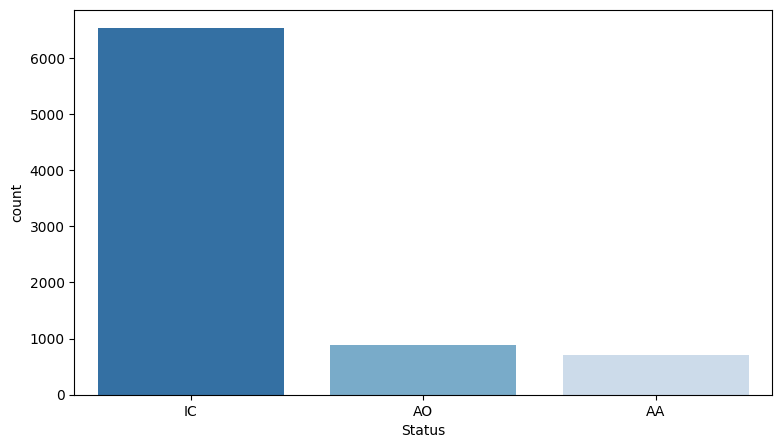

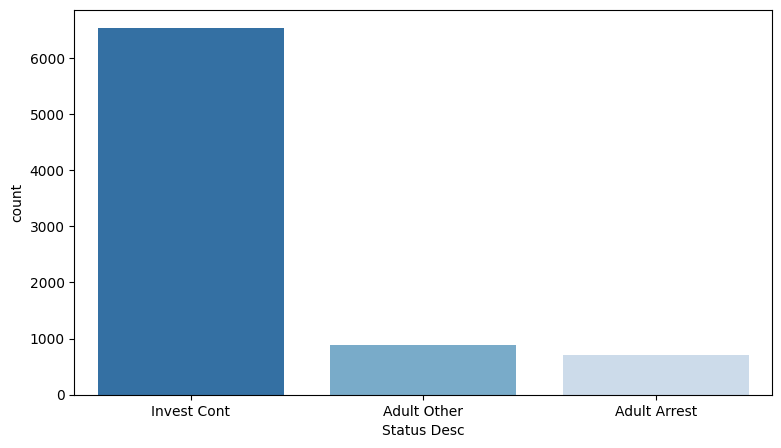

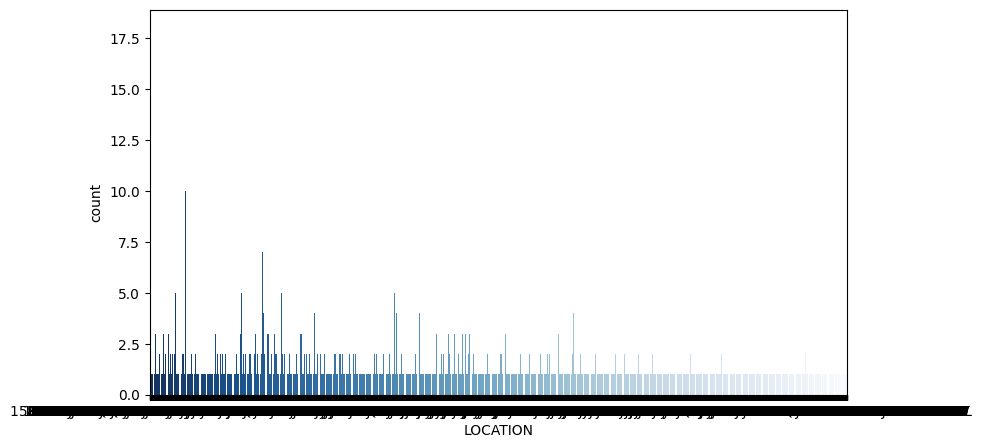

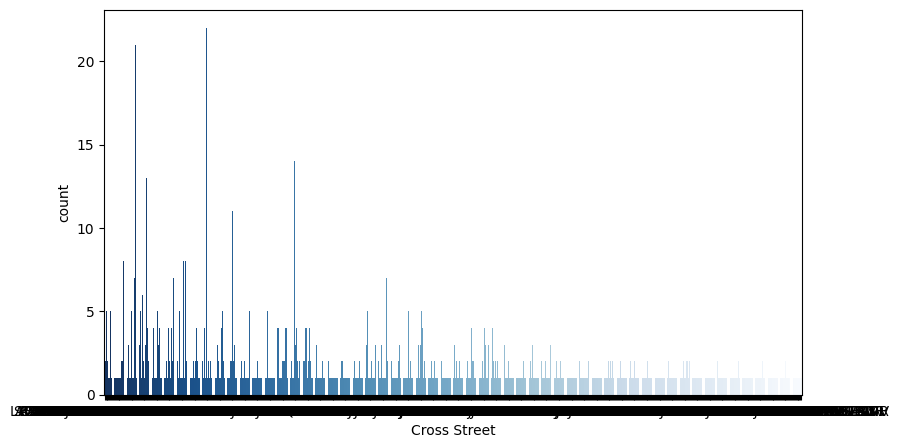

In [ ]:
columns_nonnumeric=['Date Rptd','DATE OCC','TIME OCC','AREA','AREA NAME','Rpt Dist No','Part 1-2','Crm Cd','Crm Cd Desc','Mocodes','Vict Sex','Vict Descent','Premis Cd','Premis Desc','Weapon Used Cd','Weapon Desc','Status','Status Desc','LOCATION','Cross Street']
for column in columns_nonnumeric:
    plt.figure(figsize=(9,5))
    sns.countplot(data=crime, x=column,palette="Blues_r")

This code performs visual analysis on numeric columns in the dataset. It utilizes the Seaborn library to create boxplots for each numeric column, displaying the distribution characteristics of numerical values. The boxplots are employed to observe and understand the statistical information of these numeric values within each column.

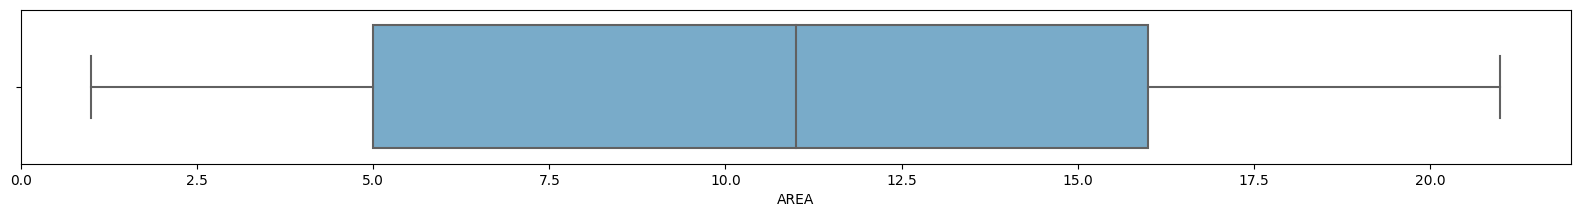

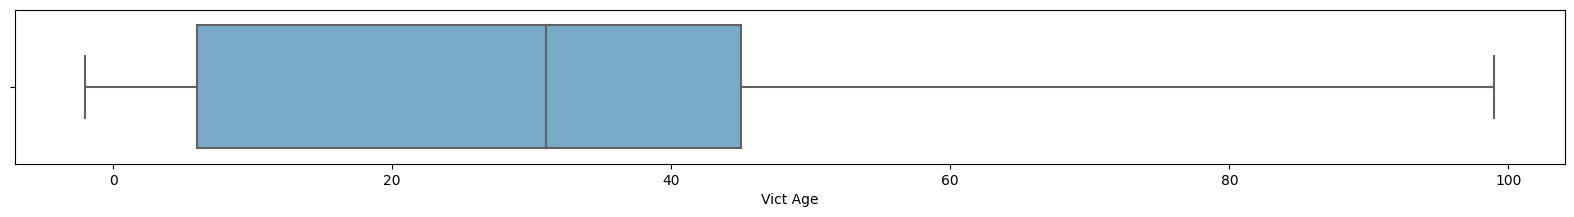

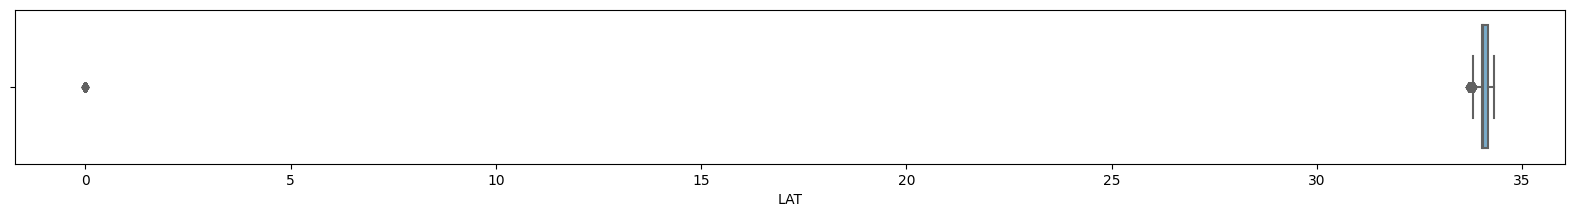

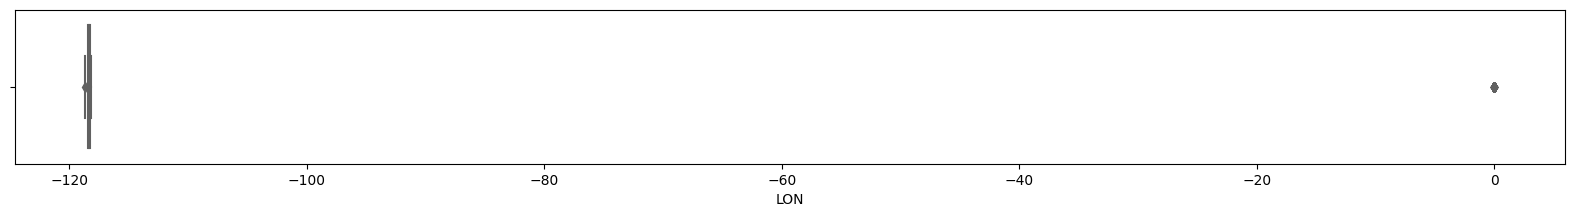

In [ ]:
columns_numeric=['AREA','Vict Age','LAT','LON']
for column in columns_numeric:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=crime, x=column,palette="Blues_r")

#Correlation Matrix

Understand the relationships between numerical features through correlation analysis. Subsequently, it divides the dataset into sets of features and a target variable, preparing the data for the upcoming machine learning modeling. The visualization of the correlation matrix assists in identifying potential patterns and relationships between features.

<ipython-input-33-a7a0a6e6c13f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime.corr()


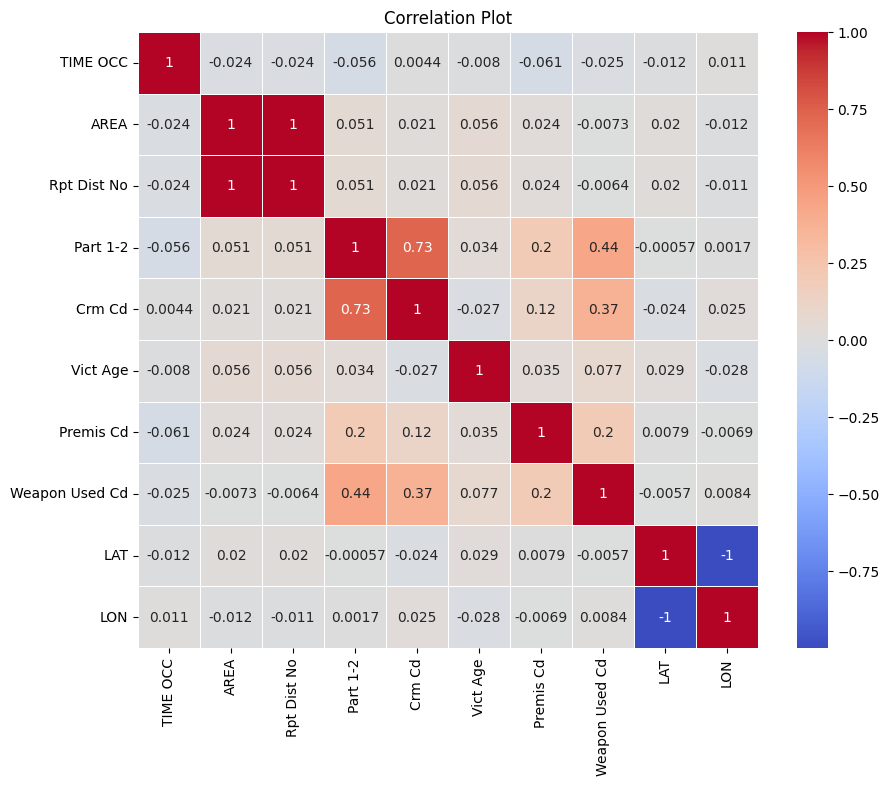

In [ ]:
crime = crime.drop(columns=['DR_NO', 'Date Rptd', 'AREA NAME', 'Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'LOCATION', 'Cross Street', 'DATE OCC', 'Mocodes',
                            'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])
crime = crime.dropna(subset=['Vict Sex', 'Vict Descent'])
crime = crime[~crime['Status'].isin(['JA', 'JO', 'CC'])]
#crime = crime.dropna()
crime = crime.reset_index(drop=True)
correlation_matrix = crime.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

# Split the data into training and testing sets
X = crime.drop("Status", axis=1)  # Features
y = crime["Status"]  # Target variable


Preprocesses the dataset using NumPy and Pandas libraries, along with the OrdinalEncoder class. It converts categorical variables 'Vict Sex' and 'Vict Descent' into integer encodings, handles missing values in the 'Weapon Used Cd' column, and similarly encodes the target variable y. These steps are aimed at providing more suitable input data for a machine learning model.

#Ordinal Encoding

In [ ]:
unique_vict_sex = np.unique(X['Vict Sex'].astype(str))
unique_vict_descent = np.unique(X['Vict Descent'].astype(str))
unique_status = np.unique(y.astype(str))

x_encoder = OrdinalEncoder(categories=[unique_vict_sex, unique_vict_descent], encoded_missing_value=-1, dtype=np.int64)
vict_encoded = x_encoder.fit_transform(X[['Vict Sex', 'Vict Descent']])
for idx in range(len(X)):
    X.loc[idx, 'Vict Sex'] = vict_encoded[idx][0]
    X.loc[idx, 'Vict Descent'] = vict_encoded[idx][1]

for idx, row in X.iterrows():
    if pd.isna(row['Weapon Used Cd']):
        X.loc[idx, 'Weapon Used Cd'] = -1

y_encoder = OrdinalEncoder(categories=[unique_status], encoded_missing_value=-1, dtype=np.int64)
reshaped_y = y.values.reshape(-1, 1)
y_encoded = y_encoder.fit_transform(reshaped_y)
y_encoded = y_encoded.reshape(y.values.shape[0])
X

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
0,1200,11,1132,2,354,33,0,13,602.0,-1.0,34.1131,-118.2684
1,2000,7,745,1,520,49,0,8,123.0,-1.0,34.0624,-118.3510
2,1745,11,1127,2,940,17,1,4,502.0,-1.0,34.1194,-118.1889
3,1915,1,171,1,330,22,1,8,108.0,-1.0,34.0462,-118.2628
4,1900,14,1463,1,330,25,0,13,108.0,-1.0,33.9762,-118.4287
...,...,...,...,...,...,...,...,...,...,...,...,...
7014,1940,10,1043,2,930,29,0,13,502.0,511.0,34.1769,-118.5384
7015,1655,13,1394,2,626,26,1,4,101.0,400.0,33.9769,-118.2739
7016,906,10,1017,1,440,43,0,13,501.0,-1.0,34.2028,-118.5022
7017,1400,16,1654,2,901,63,0,4,501.0,-1.0,34.2528,-118.4041


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#UMAP

Utilizes the UMAP (Uniform Manifold Approximation and Projection) algorithm to reduce the dimensionality of both training data (X_train) and testing data (X_test) to a two-dimensional space for visualization. The scatter plot depicts the distribution of training data in the two-dimensional space, with different classes represented by colors (red, green, and blue). It's important to note that when transforming the testing data, the existing UMAP model fitted on the training data should be used for consistency, ensuring a coherent representation.

In [ ]:
umap_model = umap.UMAP(n_components=2)
train_umap = umap_model.fit_transform(X_train)
test_umap = umap_model.fit_transform(X_test)

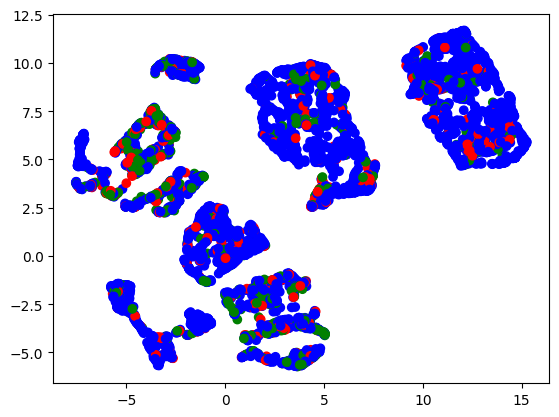

In [ ]:
colors = ['red', 'green', 'blue']
plt.scatter(train_umap[:,0], train_umap[:,1], c=[colors[i] for i in y_train])

The dispersion of samples from the same cluster into different categories or the clustering of different categories may suggest that the dimensionality reduction algorithm (such as UMAP) might not have effectively captured the intricate structure or non-linear relationships within the data. Fine-tuning UMAP hyperparameters, such as the number of neighbors and minimum distance, could be attempted to improve the representation. However, it's essential to consider whether the data itself exhibits complex structures, and further domain knowledge and feature engineering may be required to understand and address this complexity.

#Neural Network


Utilizes the MLPClassifier from scikit-learn to train multiple Multi-Layer Perceptron (MLP) models. It iteratively tests various combinations of activation functions, hidden layer sizes, and hidden neuron counts. For each combination, the model is trained and performance metrics such as iteration count, F1 score, and confusion matrix are outputted. This process aids in identifying the optimal MLP model configuration for a given dataset.

In [ ]:
func = ['identity','logistic','relu','tanh']
n_layers = range(1,5,1)
n_hidden_neuron = range(5,20,5)
comb_list = itertools.product(func, n_layers, n_hidden_neuron)

for comb in comb_list:
    print(f'Now testing function {comb[0]}, {comb[1]} layers, {comb[2]} hidden neurons')
    mlp = MLPClassifier(hidden_layer_sizes=(comb[2],)*comb[1], activation=comb[0], verbose=False, max_iter=10000, random_state=20231129)
    mlp = mlp.fit(train_umap, y_train)
    y_pred = mlp.predict(test_umap)
    print("iteration =", mlp.n_iter_)
    print("F1 score =,", metrics.f1_score(y_test, y_pred, average='micro'))
    print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred))

Now testing function identity, 1 layers, 5 hidden neurons
iteration = 52
F1 score =, 0.782051282051282
Confusion Matrix =
 [[   0    0  132]
 [   0    0  174]
 [   0    0 1098]]
Now testing function identity, 1 layers, 10 hidden neurons
iteration = 46
F1 score =, 0.782051282051282
Confusion Matrix =
 [[   0    0  132]
 [   0    0  174]
 [   0    0 1098]]
Now testing function identity, 1 layers, 15 hidden neurons
iteration = 41
F1 score =, 0.782051282051282
Confusion Matrix =
 [[   0    0  132]
 [   0    0  174]
 [   0    0 1098]]
Now testing function identity, 2 layers, 5 hidden neurons
iteration = 80
F1 score =, 0.782051282051282
Confusion Matrix =
 [[   0    0  132]
 [   0    0  174]
 [   0    0 1098]]
Now testing function identity, 2 layers, 10 hidden neurons
iteration = 23
F1 score =, 0.782051282051282
Confusion Matrix =
 [[   0    0  132]
 [   0    0  174]
 [   0    0 1098]]
Now testing function identity, 2 layers, 15 hidden neurons
iteration = 25
F1 score =, 0.782051282051282
Con

Systematically explores the performance of different configurations of MLP models by varying activation functions, hidden layer sizes, and neuron counts. While most configurations yield similar F1 scores around 0.78, there are variations in iteration counts and confusion matrices. Further fine-tuning may be necessary to optimize the model's performance on the specific dataset.

#K-Fold Validation

Implements k-fold cross-validation for training and evaluating a Multilayer Perceptron (MLP) model. After reducing the dimensionality of the input data using UMAP, each fold undergoes weighted sampling. Multiple MLP models are trained and evaluated with different parameter combinations. The script outputs performance metrics such as iteration count, F1 score, and confusion matrix. The overall goal is to optimize the classification performance of the MLP on the reduced-dimensional data through cross-validation and model tuning.

In [ ]:
kf = KFold(n_splits=5)

data_umap = umap_model.fit_transform(X)

for train_index, test_index in kf.split(data_umap):
    X_train = data_umap[train_index]
    X_test = data_umap[test_index]
    y_train = y_encoded[train_index]
    y_test = y_encoded[test_index]

    n_train_sample = len(train_index)

    class_weights = []
    unique_status_value = np.unique(y_encoded)
    for i in range(len(unique_status_value)):
        count = np.count_nonzero(y_encoded == unique_status_value[i])
        ratio = count / len(train_index)
        weight = 1 - ratio
        class_weights.append(weight)

    data_weights = []
    for i in range(len(train_index)):
        data_weights.append(class_weights[y_encoded[train_index[i]]])

    data_weights = np.array(data_weights)
    data_weights /= np.sum(data_weights)

    selected_samples_indices = np.random.choice(train_index, size=len(train_index), p=data_weights)
    X_train_sampled = data_umap[selected_samples_indices]
    y_train_sampled = y_encoded[selected_samples_indices]

    func = ['identity','logistic','relu','tanh']
    n_layers = range(1,3,1)
    n_hidden_neuron = range(5,15,5)
    comb_list = itertools.product(func, n_layers, n_hidden_neuron)

    for comb in comb_list:
        print(f'Now testing function {comb[0]}, {comb[1]} layers, {comb[2]} hidden neurons')
        mlp = MLPClassifier(hidden_layer_sizes=(comb[2],)*comb[1], activation=comb[0], verbose=False, max_iter=10000, random_state=20231129)
        print(X_train_sampled.shape)
        mlp = mlp.fit(X_train_sampled, y_train_sampled)
        y_pred = mlp.predict(X_test)
        print("iteration =", mlp.n_iter_)
        print("F1 score =,", metrics.f1_score(y_test, y_pred, average='micro'))
        print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred))

Now testing function identity, 1 layers, 5 hidden neurons
(5615, 2)
iteration = 49
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [826 578   0]]
Now testing function identity, 1 layers, 10 hidden neurons
(5615, 2)
iteration = 58
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [608 796   0]]
Now testing function identity, 2 layers, 5 hidden neurons
(5615, 2)
iteration = 83
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [693 711   0]]
Now testing function identity, 2 layers, 10 hidden neurons
(5615, 2)
iteration = 41
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [706 698   0]]
Now testing function logistic, 1 layers, 5 hidden neurons
(5615, 2)
iteration = 52
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [786 618   0]]
Now testing function logistic, 1 layers, 10 hidden neurons
(5615, 2)
iteration = 198
F1 score =, 0.0
Confusion Matrix =
 [[  0   0   0]
 [  0   0   0]
 [830 574   0]]
Now te

#Conclusion

We utilizes k-fold cross-validation to train and evaluate Multi-Layer Perceptron (MLP) models with various configurations, including different activation functions (identity, logistic, relu, tanh), numbers of hidden layers (1 or 2 layers), and varying hidden neuron counts. However, the majority of configurations exhibit F1 scores of 0, indicating suboptimal learning of data patterns. Possible reasons include insufficient data features, inappropriate model configurations, or the need for more training iterations. The overall results highlight the complex task of improving model performance, requiring careful tuning and optimization.

#GitHub Link
https://github.com/YFA22SCM49L/IITFA23CS584Project.git